# Plotting with Matplotlib

## Contents
* Introduction
* Line plots
* Scatter plots
* Error bars
* Histograms
* Bar charts
* Exercises

## Introduction

In this lesson we will introduce plotting in Python using the `matplotlib` library. This is the standard library for plotting in Python, and will cover most of your plotting requirements. The library creates similar graphics and has similar syntax to those produced by MATLAB. Next week we will introduce further plotting routines, including the `seaborn` library, which is built on `matplotlib` and adds much useful functionality for Data Science.

We will concentrate here on one-dimensional plots. 

For further information of plotting, see (amongst many other resources on the internet):
* [Python Data Science Handbook by Jake Vander Plas](https://jakevdp.github.io/PythonDataScienceHandbook/04.00-introduction-to-matplotlib.html),
* [Matplotlib documentation](https://matplotlib.org/stable/contents.html).

First, we need to import the necessary libraries, using standard abbreviations. This is similar to the shorthand `np` introduced last week for `numpy`. The main set of routines that we requires are `matplotlib.pyplot`, which is abbreviated as `plt`.

In [138]:
import matplotlib.pyplot as plt

Since we are using this in a Jupyter notebook, we will create static figures which are embedded inline in the notebook using the magic command `%matplotlib`. Alternatively, we could use `%matplotlib notebook` to create interactive figures.

In [76]:
%matplotlib inline

We will also use the classic `matplotlib` style. This is the default style and does not need to be set. However, if you want to change the style, you can use the same syntax.

In [12]:
plt.style.use('classic')

To view other styles, we can view the following list. For example, seaborn style is the style used by the `seaborn` library, and ggplot style produces figures similar to those produced by the statistical Data Science package R.

In [78]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

To create a simple figure we can use `np.linspace()` to create an evenly spaced array and then plot the sin and cosine of these values. This creates a "png" image which is embedded in the notebook. 

If you were doing this in a Python shell, you would need to type `plt.show()` to display the current figure. This is not required in Jupyter. Note that the commands for plotting are limited to each cell.

In this example the command `fig = plt.figure()` is used so that we can save the figure associated with this plot in the following cell. The object `fig` carries over cells, even though the plot does not. If you do not need to save the figure, this command is not needed. This corresponds to one of the two ways of accessing `matplotlib` which will be discussed later.

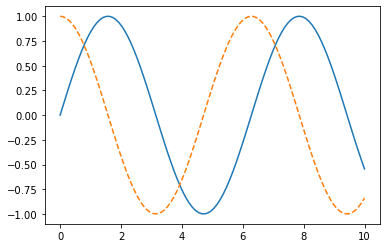

In [4]:
import numpy as np
x = np.linspace(0, 10, 100)
import matplotlib.pyplot as plt

fig = plt.figure()
plt.plot(x, np.sin(x), '-')
plt.plot(x, np.cos(x), '--');

Now we can save the figure to a png file in our working directory.

In [6]:
fig.savefig('my_figure.png')

Using the `%ls` magic command (lists the contacts of the current directory), the new png file now exists in our directory.

In [8]:
%ls my_figure.png

 驱动器 C 中的卷是 Windows-SSD
 卷的序列号是 B84B-B82F

 C:\Users\wsm\Downloads 的目录

2021/03/30  09:55            21,002 my_figure.png
               1 个文件         21,002 字节
               0 个目录 136,869,769,216 可用字节


This file (or any image file) can now be plotting using the `Image` command.

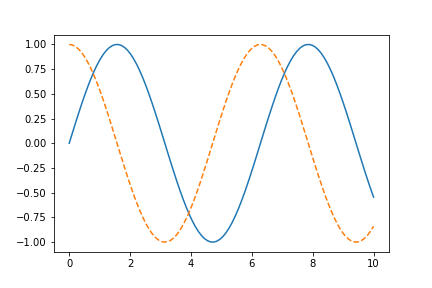

In [10]:
from IPython.display import Image
Image('my_figure.png')


To view the filetypes that we can save to, we can view the output of the following command:

In [83]:
fig.canvas.get_supported_filetypes()

{'eps': 'Encapsulated Postscript',
 'jpg': 'Joint Photographic Experts Group',
 'jpeg': 'Joint Photographic Experts Group',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'ps': 'Postscript',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format'}

Try plotting the same plot as above but in a different style.

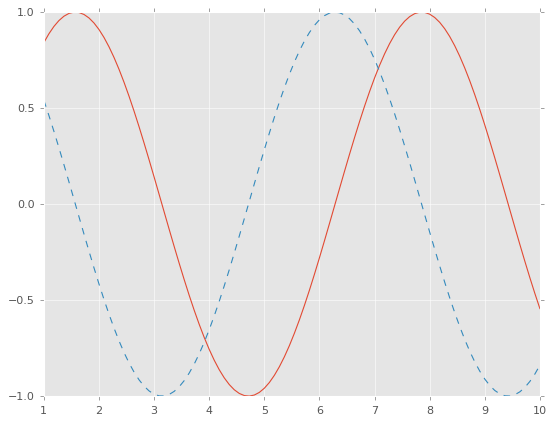

In [19]:
#same plot in different style here

plt.style.use('ggplot')
plt.plot(x, np.sin(x), '-')
plt.plot(x, np.cos(x), '--')
#plt.style.use('ggplot')


The syntax we have just used mixes the two ways that the `matplotlib` interface can be accessed, corresponding to functional calls and object-orientated calls. The functional calls are simpler, but the object-orientated calls are more powerful. We will concentrate on the functional calls here, but you should be aware of the two ways of calling `matplotlib`. 

For functional calls we successively call the functions to create a plot. So, in the example below we create two subplots and after each subplot call, then call the plotting routine that is to going in that subplot. For example, if we changed the order of the last two calls, the cosine plot would be overlayed on the sine plot.

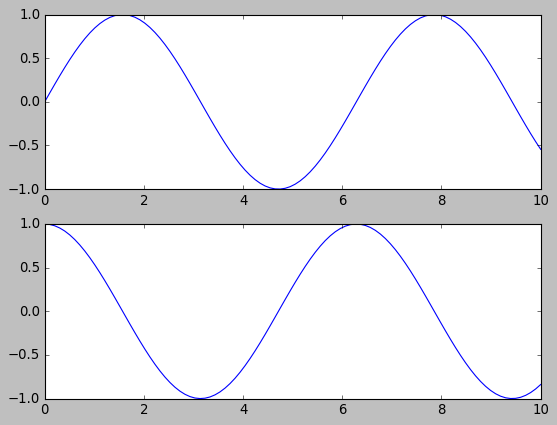

In [147]:
# create the first of two panels and set current axis
plt.subplot(2, 1, 1) # (rows, columns, panel number)
plt.plot(x, np.sin(x))

# create the second panel and set current axis
plt.subplot(2, 1, 2)
plt.plot(x, np.cos(x));

Show that if we changed the order of the last two calls, the cosine plot would overlay on the sine plot

In the object-orientated approach, we first initialize the figure and the axes, and then we add plots to each of those axes using the `plot` method associated with the axis. Now, the order of the method doesn't matter. We could, for example, add a final command which adds further detail to the upper plot.

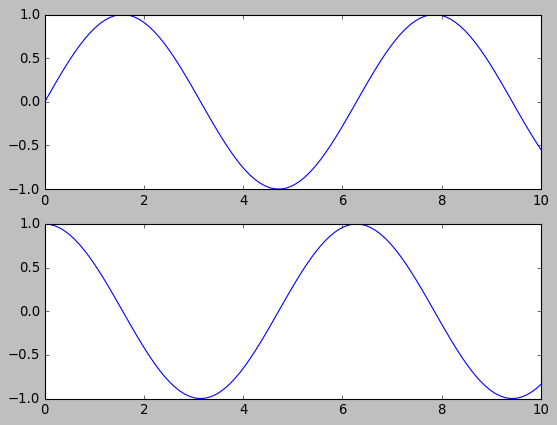

In [85]:
# First create a grid of plots
# ax will be an array of two Axes objects
fig, ax = plt.subplots(2)

# Call plot() method on the appropriate object
ax[0].plot(x, np.sin(x))
ax[1].plot(x, np.cos(x));

## Line plots

The simplest types of plots that we can create are lines plots. We have already seen how to do this in the Introduction, were we just need to specify the `x` and `y` datasets. Here we can plot the sine function over the domain [0,10].

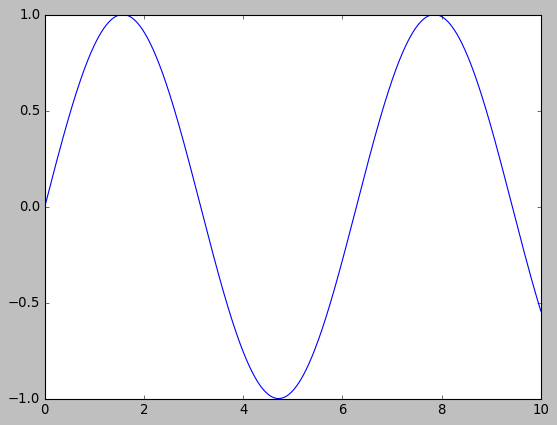

In [86]:
x = np.linspace(0, 10, 1000)
plt.plot(x, np.sin(x));

To create a second plot on the same axes, we call `plot` again with different datasets. This could be different x and y arrays. Now the cosine and sine plots are in different colours. As further plots are added `matplotlib` will cycle through a sequence of colours.

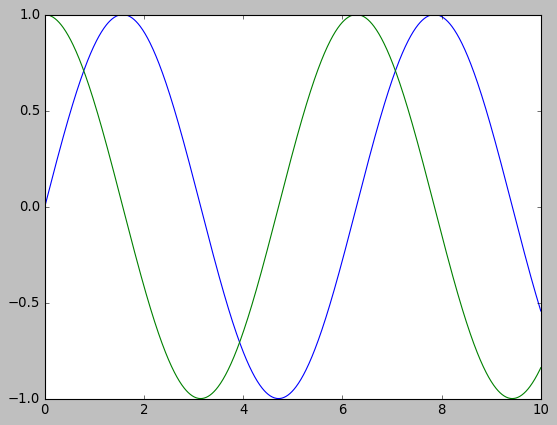

In [87]:
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x));

Alternatively, the user can specify a colour. Below are six different ways to specify the colour for a plot.

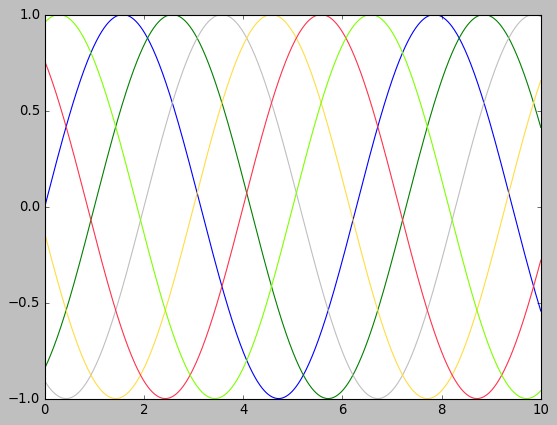

In [88]:
plt.plot(x, np.sin(x - 0), color='blue')        # specify color by name
plt.plot(x, np.sin(x - 1), color='g')           # short color code (rgbcmyk)
plt.plot(x, np.sin(x - 2), color='0.75')        # Grayscale between 0 and 1
plt.plot(x, np.sin(x - 3), color='#FFDD44')     # Hex code (RRGGBB from 00 to FF)
plt.plot(x, np.sin(x - 4), color=(1.0,0.2,0.3)) # RGB tuple, values 0 to 1
plt.plot(x, np.sin(x - 5), color='chartreuse'); # all HTML color names supported

The linestyle can also specified, in addition to the colour. There are four standard linestyles used by `matplotlib`, which are shown below. Customised linestyles can also be defined by the user, but we will not cover that here.

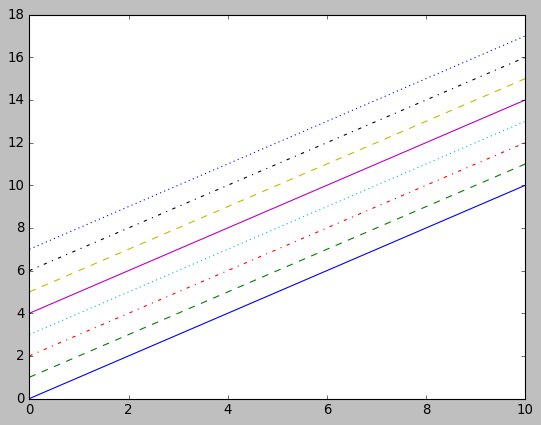

In [89]:
plt.plot(x, x + 0, linestyle='solid')
plt.plot(x, x + 1, linestyle='dashed')
plt.plot(x, x + 2, linestyle='dashdot')
plt.plot(x, x + 3, linestyle='dotted');

# For short, you can use the following codes:
plt.plot(x, x + 4, linestyle='-')  # solid
plt.plot(x, x + 5, linestyle='--') # dashed
plt.plot(x, x + 6, linestyle='-.') # dashdot
plt.plot(x, x + 7, linestyle=':');  # dotted

The linestyle and colour can be combined into a single argument for `plot()` by using the abbreviated forms. In the figure below four possibles combinations are shown.

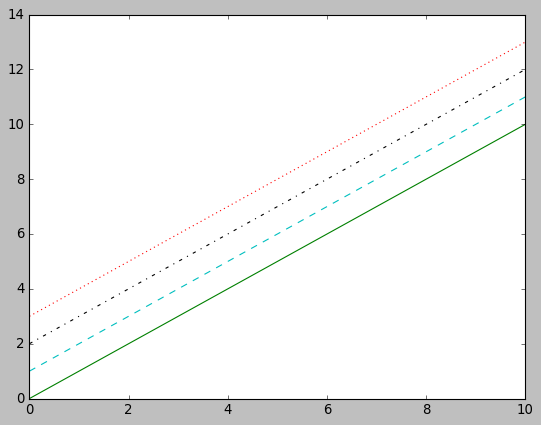

In [90]:
plt.plot(x, x + 0, '-g')  # solid green
plt.plot(x, x + 1, '--c') # dashed cyan
plt.plot(x, x + 2, '-.k') # dashdot black
plt.plot(x, x + 3, ':r');  # dotted red

`matplotlib` will automatically set the axes for the plot based on what it deems as the best option for the dataset. However, the limits of the axes can also be set by the user using `xlim` (x-axis limits) and `ylim` (y-axis limits). The arguments for this take the form (xmin,xmax) and (ymin,ymax), and you can have xmax < xmin or ymax < ymin (note that this will flip the axis).

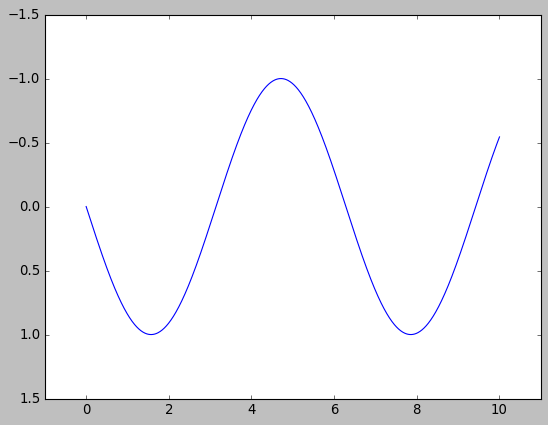

In [92]:
plt.plot(x, np.sin(x))

plt.xlim(-1, 11)
plt.ylim(-1.5, 1.5);

The axis limits can also be set using the single command `axis`, for which the arguments are (xmin,xmax,ymin,ymax). Again you can have xmax < xmin and ymax < ymin.

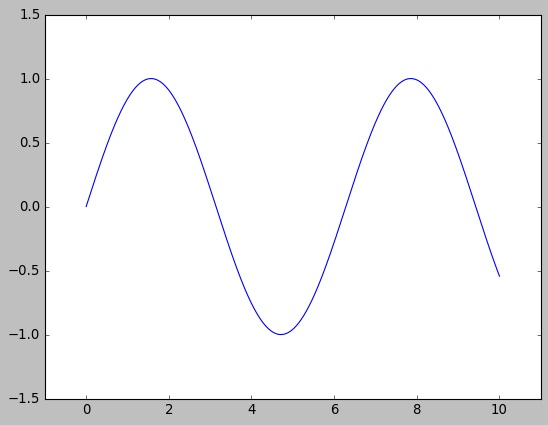

In [93]:
plt.plot(x, np.sin(x))
plt.axis([-1, 11, -1.5, 1.5]);

`axis` also takes string arguments. The first example is 'tight', which squeezes the axes so that minimal domain and range are used, rather than rounding the axis limits.

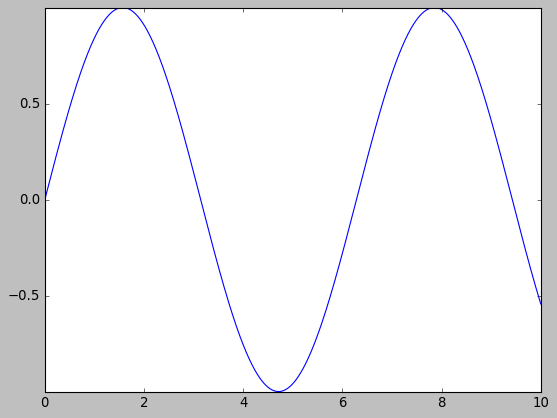

In [94]:
plt.plot(x, np.sin(x))
plt.axis('tight');

The second example is 'equal', which makes the scale of the x and y axis equal.

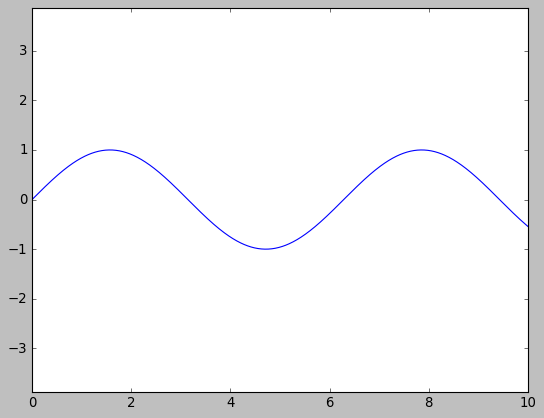

In [95]:
plt.plot(x, np.sin(x))
plt.axis('equal');


All figures should have labels, to add labels to the x and y axis, we use `xlabel()` and `ylabel()` respectively. To add a figure title, we use `title()`. The arguments for all three of these functions are strings, which could include formatted numbers related to the plot or special characters and mathematical formulae using [LaTeX](https://en.wikipedia.org/wiki/LaTeX).

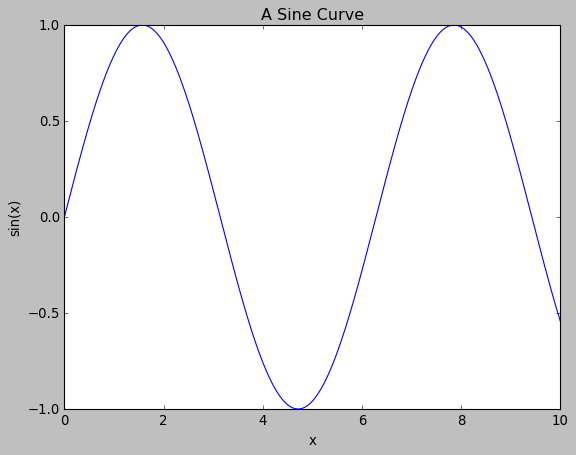

In [96]:
plt.plot(x, np.sin(x))
plt.title("A Sine Curve")
plt.xlabel("x")
plt.ylabel("sin(x)");

For figures with multiple plots, a title may not be able to adequately describe each of the plots. In this case it is better to use a plot legend using the function `legend`. To use this we specify a description in each of the plot calls using the argument `label`. This argument will be a string. Then at the completion of the plot the function `legend()` is called. Without any arguments or with the argument 'best', `matplotlib` chooses the best place for legend. The user can override this by specifying their preferred position as a string option. The various options can be found by viewing the help documentation for `legend()`.

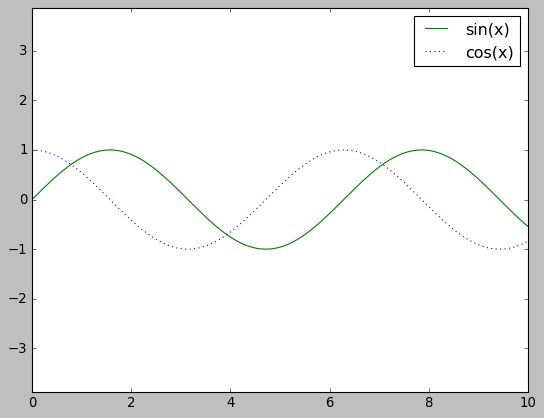

In [97]:
plt.plot(x, np.sin(x), '-g', label='sin(x)')
plt.plot(x, np.cos(x), ':b', label='cos(x)')
plt.axis('equal')

plt.legend();

### Scatter plots

Scatter plots are very similar to line plots, except that the data points are plotted, rather than `matplotlib` attempting to draw a curve through the points. For example, we may want to do this if we have a number of observations of data, rather than a function relating x and y. 

There are two ways to create scatter plots: using `plot()` and using `scatter()`. To use `plot()` we use the same format as before, but rather than specifying a linestyle we specify a plot marker. For example, to plot a data set with a closed circle or dot, we can specify the plot marker 'o'.

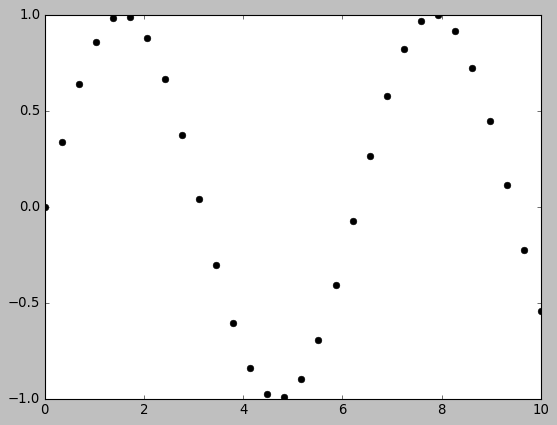

In [98]:
x = np.linspace(0, 10, 30)
y = np.sin(x)

plt.plot(x, y, 'o', color='black');

There are a range of plot markers that can be used. For the full list see the help documentation for `plot()` or `scatter()`. However, the example below shows 11 plot markers for a randomly generated dataset. For each plot symbol five uniformly distributed data points are plotted. Notice how the label is formated so that it can included information about the argument for the plot marker. The argument `numpoints=1`, tells `matplotlib` to create only one legend entry for each plot marker style.

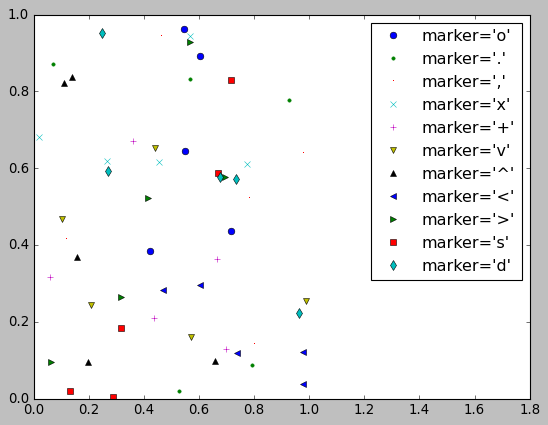

In [99]:
rng = np.random.RandomState(0)
for marker in ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']:
    plt.plot(rng.rand(5), rng.rand(5), marker,
             label="marker='{0}'".format(marker))
plt.legend(numpoints=1)
plt.xlim(0, 1.8);

The specification of the plot marker can be combined with the colour, using the abbreviation for each. We can also specify a line style which plots the data points and draws a curve between these points. 

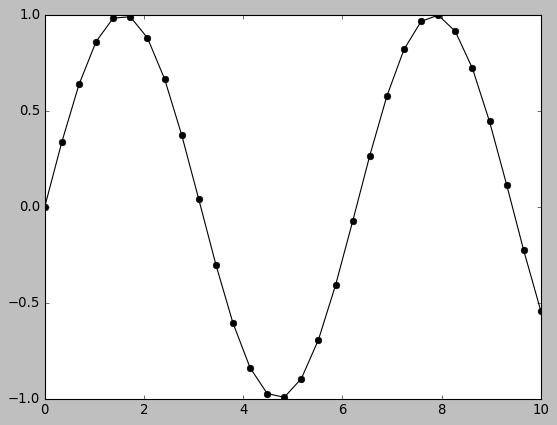

In [100]:
plt.plot(x, y, '-ok');

There are a number of other arguments that can be used to specify the details of the plot marker. The attributes beginning with 'marker' modify the plot marker, where those that begin with 'line' modify the plot line. Some examples are shown in the following cell. Again to find all the attributes see the help documentation for `plot()` or `scatter()`.

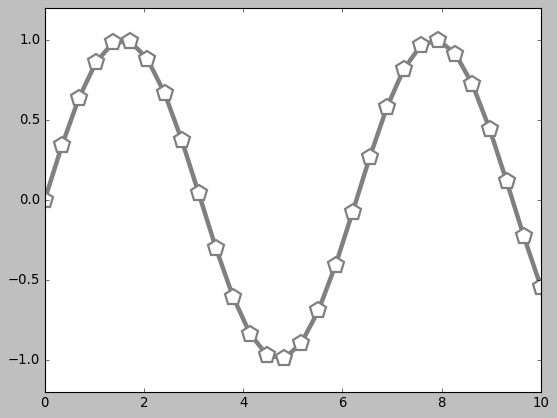

In [101]:
plt.plot(x, y, '-p', color='gray',
         markersize=15, linewidth=4,
         markerfacecolor='white',
         markeredgecolor='gray',
         markeredgewidth=2)
plt.ylim(-1.2, 1.2);

The second way to create scatter plots is using `scatter()`. This has much greater functionality that `plot()`, but can be much slower for large datasets.

In its simplest form `scatter()` has exactly the same syntax as `plot()`, as in the following cell.

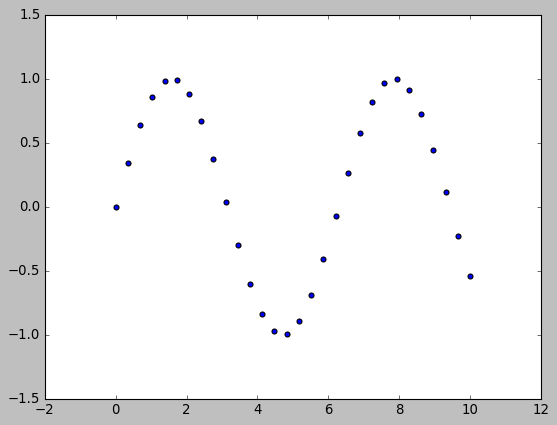

In [102]:
plt.scatter(x, y, marker='o');

However, `scatter()` can use the features of the dataset to add further information to the plot for each of the data points. For example, the size and colour of each point can be dependent on the features of the data. In the following cell, the colour and size is a random function. The transperency of each point is set by the argument 'alpha', which here is set to a constant. This varies from `alpha=0`, corresponding to fully transparent, to `alpha=1`, corresponding to solid colours.

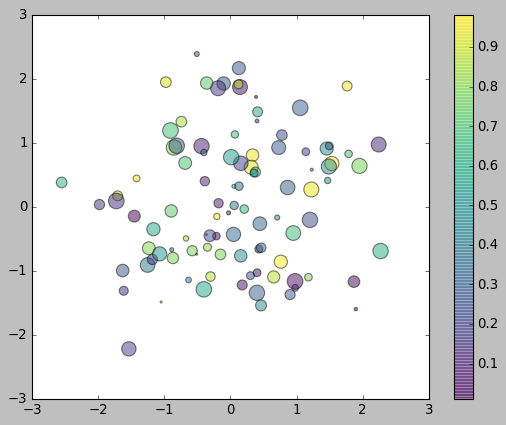

In [103]:
rng = np.random.RandomState(0)
x = rng.randn(100)
y = rng.randn(100)
colors = rng.rand(100)
sizes = 200 * rng.rand(100)

plt.scatter(x, y, c=colors, s=sizes, alpha=.5,
            cmap='viridis')
plt.colorbar();  # show color scale

This can be used with the [Iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set) to show added information as to how information varies. The dataset has four measurements: sepal length, sepal width, petal length and petal width, and labels corresponding to the three species of Iris. Now we can use a scatter plot to show how the species varies with the first two measurements, and the size can be made proportional to the fourth measurement (petal width). 

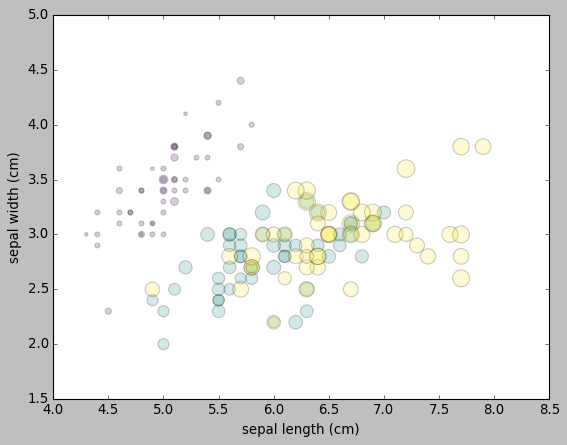

In [104]:
from sklearn.datasets import load_iris
iris = load_iris()
features = iris.data.T

plt.scatter(features[0], features[1], alpha=0.2,
            s=100*features[3], c=iris.target, cmap='viridis')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1]);

## Errorbars

In science we often need to quantify the errors associated with measurements. This is especially important in Data Science, as we need to provide confidence in the reliability of models. For discrete measurements these can be displayed graphically using the `errorbar()` function. Say for example that we have a sinusoidal signal with some superimposed random noise of strength 'dy'. Then the confidence intervals for our measurements are that the truth lies within [y-dy,y+dy]. This interval can then be displayed by specifying the argument `yerr=dy` in calling `errorbar()`. Here the error is a constant, but it could be an array of the same length as y, or twice the length of y. To see how this and 'xerr' can be specified, see the help documentation for `errorbar()`.

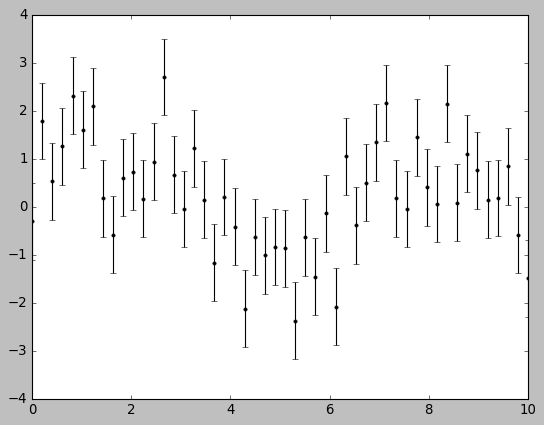

In [105]:
x = np.linspace(0, 10, 50)
dy = 0.8
y = np.sin(x) + dy * np.random.randn(50)

plt.errorbar(x, y, yerr=dy, fmt='.k');

Again the errorbars can be configured by specifying the values of particular arguments in calling `errorbar()`.

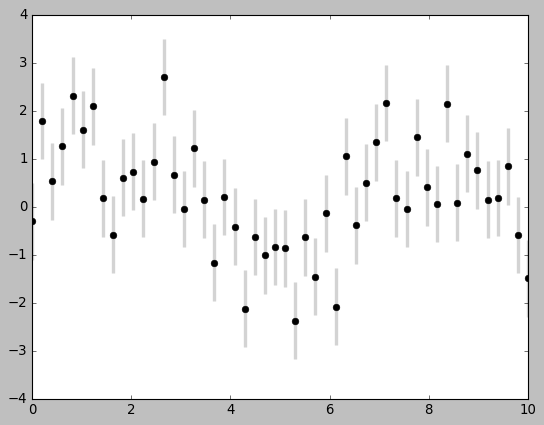

In [106]:
plt.errorbar(x, y, yerr=dy, fmt='o', color='black',
             ecolor='lightgray', elinewidth=3, capsize=0);

For continuous data we typically want to plot a continuous line to quantify the errors. This could be done using three calls to `plot()` for the line and the lower and upper limits for the errors. However, an alternative way to display this is to display a confidence band for our measurements as a filled region. This can be done using the function `fill_between()`.

In this example we have a set of measurements `xdata` and `ydata` and we want to fit the line of best fit to the data, which can be done using the function `np.polyfit()`. Then the confidence interval or error estimate for the line of best fit can be calculated using the statistics for `xdata`.

In [108]:
xdata = np.linspace(0, 10, 11)
ydata = [3.9, 4.4, 10.8, 10.3, 11.2, 13.1, 14.1,  9.9, 13.9, 15.1, 12.5]

# fit a linear curve an estimate its y-values and their error.
a, b = np.polyfit(xdata, ydata, deg=1)
y_est = a * xdata + b
y_err = xdata.std() * np.sqrt(1/len(xdata) +
                          (xdata - xdata.mean())**2 / np.sum((xdata - xdata.mean())**2))

We can now plot the data points, the line of best fit and the confidence interval for the line of best fit using `fill_between()`. As we want to overlay curves and data points the transperency of the filled region is typically set to close to zero.

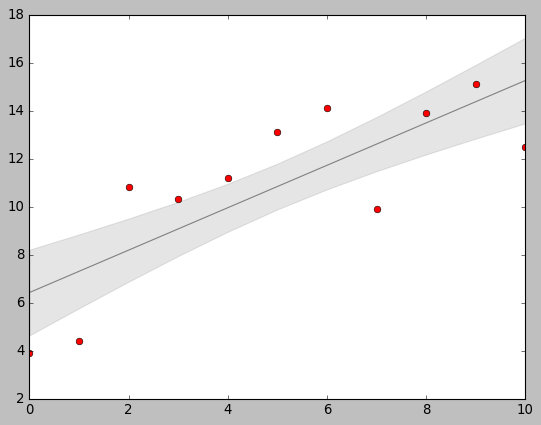

In [109]:
# Visualize the result
plt.plot(xdata, ydata, 'or')
plt.plot(xdata, y_est, '-', color='gray')

plt.fill_between(xdata, y_est - y_err, y_est + y_err,
                 color='gray', alpha=0.2)
plt.xlim(0, 10);

## Histograms

Histograms are useful to visualize the frequency that a particular measurement occurs with. The measurements are continuously varying, but a histogram will group these into 'bins' of discrete range of measurements. The `matplotlib` function `plt.hist()` allows the user to quickly create these plots.

In the following cell the distribution of 1000 random chosed numbers is shown. The distribution should be such that it has mean approximately zero and standard deviation approximately one (approximately 68% of the measurements should like within one standard deviation either side of the mean). The range of each of the bins corresponds to the x limits of each rectangle.

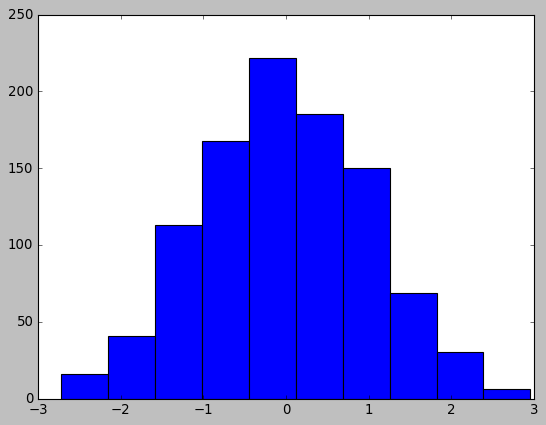

In [111]:
data = np.random.randn(1000)
plt.hist(data);

As with the other plotting routines there are numerous options to customize the histograms. These can be investigated by view the help documentation for `plt.hist()`. Setting the argument `bins` allows the user to define how many equally sized bins to separate the measurements into, while setting `density=True` plots the relative frequency of the measurements, such that the area of histogram is equal to one.

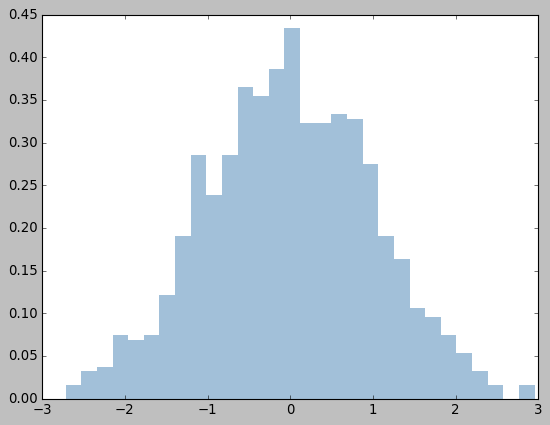

In [113]:
plt.hist(data, bins=30, density=True, alpha=0.5,
         histtype='stepfilled', color='steelblue',
         edgecolor='none');

Multiple histograms can be included on the one plot, as in the following cell. In this case it is useful to have the plots relatively transparent, for ease of comparison. 

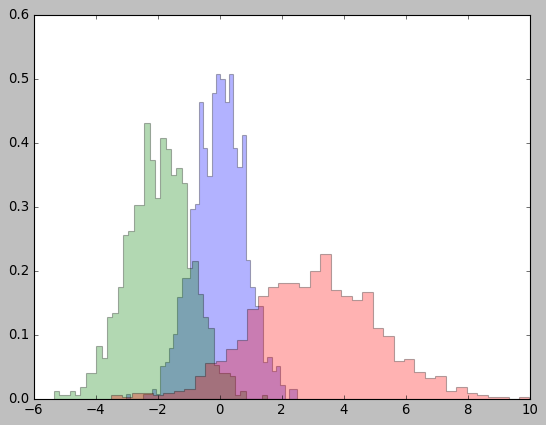

In [114]:
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

plt.hist(x1,histtype='stepfilled', alpha=0.3, density=True, bins=40)
plt.hist(x2,histtype='stepfilled', alpha=0.3, density=True, bins=40)
plt.hist(x3,histtype='stepfilled', alpha=0.3, density=True, bins=40);

## Bar Charts

Bar charts allow users to plot features associated with categorical data, i.e., the data falls into discrete categories. The `matplotlib` function for plotting these is `plt.bar()`. For example, in the following cell we want to plot the sample popularity of different pets, and here we specify the categories as strings. 

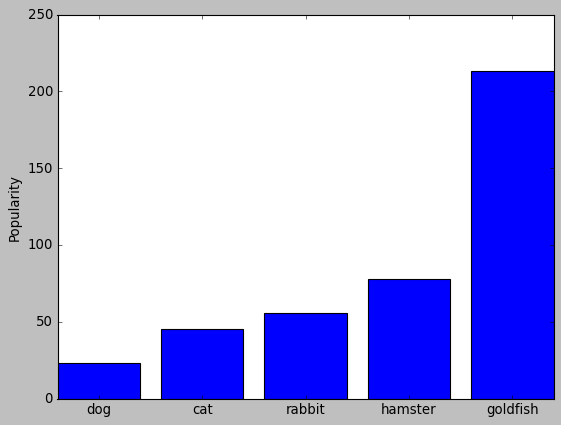

In [115]:
cats = ['dog','cat','rabbit','hamster','goldfish']
data = [23, 45, 56, 78, 213]
plt.bar(cats, data)
plt.ylabel('Popularity');

Sometimes it may be more helpful to have the bars as horizontal measurements, for which we can use `plt.barh()`. In this case we need to set the `xlabel`, rather than `ylabel`. We can set various attributes of the bars by using the keywords for the plotting routine, for example, setting each of the bars to individual colours. To set all to the same colour we just pass a single string.

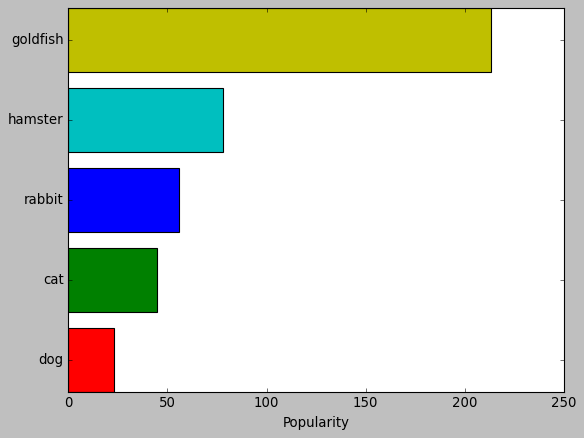

In [116]:
plt.barh(cats, data, color=['r', 'g', 'b', 'c', 'y'])
plt.xlabel('Popularity');

As with the the error plots, we can add error bars to the individual categories. Here we specify an array the same length as the data, which plots equal upper and lower limits for the errors.

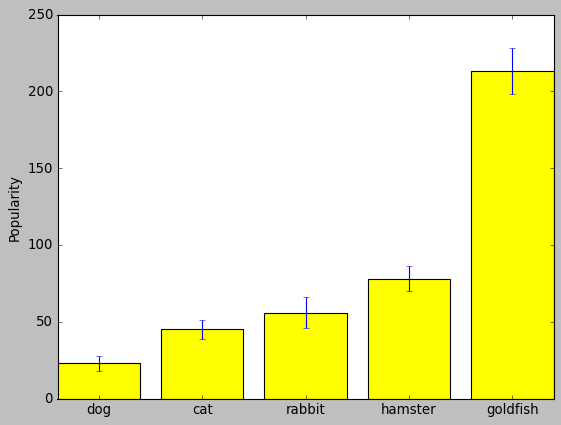

In [117]:
y_err = [5,6,10,8,15]

plt.bar(cats, data, yerr=y_err, color='yellow', ecolor='blue')
plt.ylabel('Popularity');

If we have categories with multiple critera, then there are two ways that we can plot the bar charts. The first it to plot side-by-side charts for each category. In this case we need to introduce a dummy index which is the length of our labels. The charts are then plotted against this index, and the final step is to print the labels on the x axis using `plot.xticks()`. 

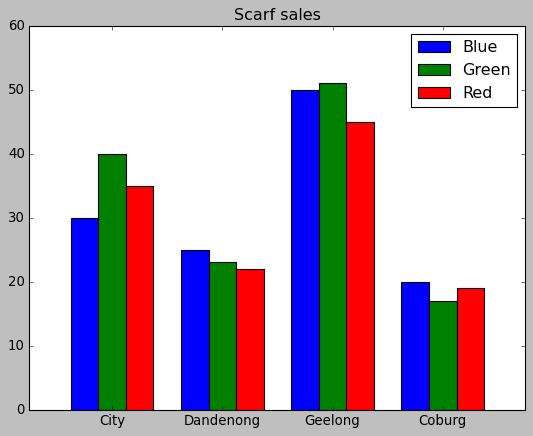

In [118]:
data = np.array([[30, 25, 50, 20],[40, 23, 51, 17],[35, 22, 45, 19]])
labels = ['City', 'Dandenong', 'Geelong', 'Coburg']

X = np.arange(len(labels))
bar_width=.25
plt.bar(X + 0.00, data[0,:], color = 'b', width = bar_width, label='Blue')
plt.bar(X + 0.25, data[1,:], color = 'g', width = bar_width, label='Green')
plt.bar(X + 0.50, data[2,:], color = 'r', width = bar_width, label='Red')
plt.xticks(X + .25, labels)
plt.title('Scarf sales')
plt.legend();

In [124]:
?plt.xticks


The alternative is to create stacked charts, were each series is added to the top of the previous series. This uses the keyword `bottom` to raise each successive chart.

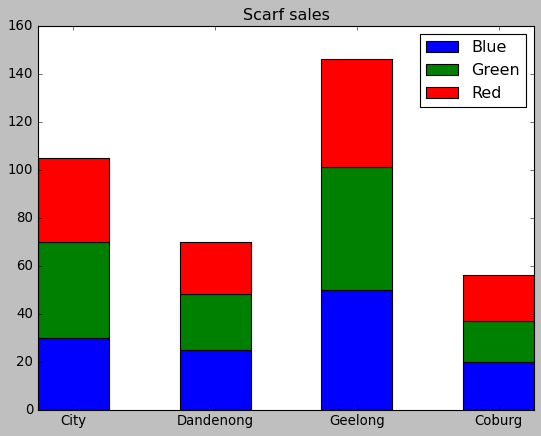

In [125]:
bar_width=.5
plt.bar(labels, data[0,:], bar_width, label='Blue')
plt.bar(labels, data[1,:], bar_width, bottom=data[0,:], label='Green')
plt.bar(labels, data[2,:], bar_width, bottom=data[0,:]+data[1,:], label='Red')
plt.title('Scarf sales')
plt.legend();

## Exercises 

### Exercise 1

The high, low and closing prices for Microsoft stock over the last month are shown in the cell below. The date is days before 19 March 2021, and the stock prices are in US Dollars.

Create a figure which plots the high, low and closing prices over the last month against the date array. Use different colours and plot markers for each of the lines. Your plot should include an appropriate legend, title and x and y axis labels.

['20Feb', '23Feb', '24Feb', '25Feb', '26Feb', '27Feb', '1Mar', '2Mar', '3Mar', '4Mar', '5Mar', '8Mar', '9Mar', '10Mar', '11Mar', '12Mar', '15Mar', '16Mar', '17Mar', '18Mar', '19Mar']
21


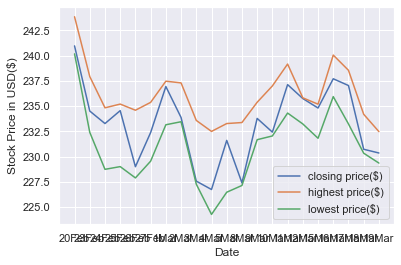

In [70]:
import numpy as np
date = np.array([-27,-24,-23,-22,-21,-20,-18,-17,-16,-15,-14,-11,-10,
                 -9,-8,-7,-4,-3,-2,-1,0
                ])
high = np.array([243.86,237.93,234.83,235.2,234.59,235.37,237.47,237.3,233.58,232.49,
                 233.27,233.37,235.38,237,239.17,235.82,235.19,240.06,238.55,234.19,232.47
                ])
low = np.array([240.18,232.4,228.73,229,227.88,229.54,233.15,233.45,227.26,224.26,226.46,
                227.13,231.67,232.04,234.31,233.23,231.81,235.94,233.23,230.33,229.35
                ])
closing = np.array([240.97,234.51,233.27,234.55,228.99,232.38,236.94,233.87,227.56,226.73,
                    231.6,227.39,233.78,232.42,237.13,235.75,234.81,237.71,237.04,230.72,230.35
                ])
import matplotlib.pyplot as plt

enddate = 19
a=[]
b=[]
for i in date:
    if i in range(-27,-19):
        b.append('{}Feb'.format(enddate+i+28))
    if i in range(-18,1):
        a.append('{}Mar'.format(enddate+i))
exactdate= b+a
print(b+a)
print(len(b+a))
plt.xlabel('Date')
plt.ylabel('Stock Price in USD($)')
plt.plot(exactdate,closing,label= 'closing price($)')
plt.plot(exactdate,high,label= 'highest price($)')
plt.plot(exactdate,low,label= 'lowest price($)')
plt.legend()




  


  
    



### Exercise 2

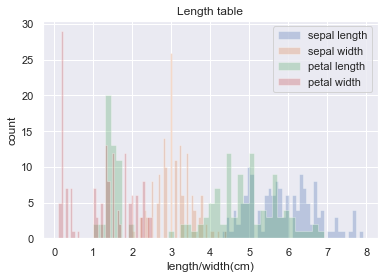

In [59]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
iris =load_iris()
features = iris.data.T



plt.hist(features[0],histtype='stepfilled', alpha=0.3, density=False, bins=40 ,label='sepal length')
plt.hist(features[1],histtype='stepfilled', alpha=0.3, density=False, bins=40 ,label='sepal width')
plt.hist(features[2],histtype='stepfilled', alpha=0.3, density=False, bins=40 ,label='petal length')
plt.hist(features[3],histtype='stepfilled', alpha=0.3, density=False, bins=40 ,label='petal width')
plt.xlabel("length/width(cm)")
plt.ylabel("count")
plt.title("Length table")
plt.legend()


The Iris dataset (imported above) which was considered in the scatter plots, has four features corresponding to sepal length, sepal width, petal length and petal width, all measured in cm. Create an overlayed histogram which compares the relative frequency of these four features. Your plot should include an appropriate legend, title and x and y axis labels.

### Exercise 3

The list `cities` in the following cell contains the population and latitude and longitude of thirteen major cities of Australia. Use this to plot the position of the cities with size proportional to the population (used `scaled_pop`), and coloured dependent on whether they are the national capital, state capital or regional cities. The legend should explain this last feature.  

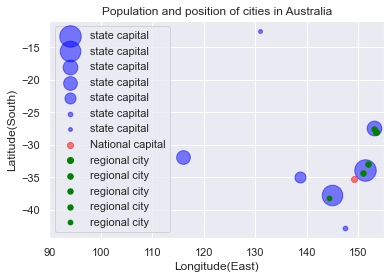

In [60]:
cities = [['Sydney','Melbourne','Brisbane','Perth','Adelaide', 'Gold Coast',
           'Canberra','Newcastle','Wollongong','Logan City','Geelong','Hobart', 'Darwin'],
          [4627345, 4246375, 2189878, 1896548, 1225235, 591473, 367752, 
           308308, 292190, 282673, 226034, 216656, 147255],
          [-33.868, -37.814, -27.468, -31.952, -34.929, -28, -35.283, 
           -32.93, -34.424, -27.639, -38.147, -42.879, -12.462827],
          [151.207, 144.963, 153.028, 115.861, 138.599, 153.431, 149.128,
           151.78, 150.893, 153.109, 144.361, 147.329, 130.841782]]
#scale_factor = 0.0001
#scaled_pop = scale_factor*x for x in cities[1]]
import numpy as np
import matplotlib.pyplot as plt
rng = np.random.RandomState(0)
a = cities[3]
b = cities[2]
c= cities[1]

#plt.scatter(x,y,s=0.0001*c[6],alpha=.5,color='red')
for i in range(0,5):
    x1= a[i]
    y1= b[i]
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.scatter(x1,y1,s=0.0001*c[i],alpha=.5,color='blue',label='state capital')
for j in range(11,13):
    x2=a[j]
    y2=b[j]
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.scatter(x2,y2,s=0.0001*c[j],alpha=.5,color='blue',label ='state capital')
x= a[6]
y= b[6]
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.scatter(x,y,s=0.0001*c[6],alpha=.5,color='red',label='National capital')
x3=a[5]
y3=b[5]
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.scatter(x3,y3,s=0.0001*c[6],alpha=1,color='green',label='regional city')
for k in range(7,11):
    x4=a[k]
    y4=b[k]
    plt.xlabel('Longitude(East)')
    plt.ylabel('Latitude(South)')
    plt.scatter(x4,y4,s=0.0001*c[k],alpha=1,color='green',label ='regional city')
    plt.title('Population and position of cities in Australia')
    plt.xlim(90,155)
    plt.legend()

### Exercise 4

The population of the five most populous Australian cities at the last three census is recorded in the following cell. Plot a side-by-side bar chart to show the change in the populations. The chart should be grouped by each city and show each census in different colours. The legend should explain the colours for the census. Your plot should include an appropriate title.

In [181]:
cities = ['Sydney','Melbourne','Brisbane','Perth','Adelaide']
Pop_2016 = [4321535,4196198,2054614,1874578,1165632]
Pop_2011 = [3908642,3707530,1874427,1627576,1103979]
Pop_2006 = [3641422,3371888,1676389,1256035,1040719]


Text(0, 0.5, 'population in million')

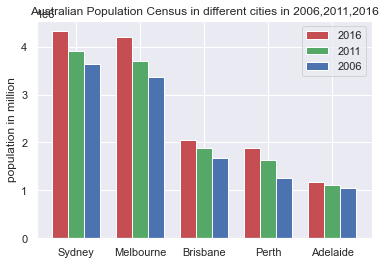

In [54]:
import matplotlib.pyplot as plt

cities = ['Sydney','Melbourne','Brisbane','Perth','Adelaide']
Pop_2016 = [4321535,4196198,2054614,1874578,1165632]
Pop_2011 = [3908642,3707530,1874427,1627576,1103979]
Pop_2006 = [3641422,3371888,1676389,1256035,1040719]

X = np.arange(len(cities))
bar_widths= 0.25
plt.bar(X+0.00,Pop_2016,color ='r',width=bar_widths,label='2016')
plt.bar(X+0.25,Pop_2011,color ='g',width=bar_widths,label='2011')
plt.bar(X+0.50,Pop_2006,color ='b',width=bar_widths,label='2006')    
plt.xticks(X + .25, cities)

plt.title('Australian Population Census in different cities in 2006,2011,2016')

plt.legend()
plt.ylabel('population in million')